# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

0.29649883180408443
2.844568913782757 0.2926755720191694
2.8485697139427884 0.28884762755766547
2.8525705141028204 0.2850150596911077
2.8565713142628524 0.28117792976503625
2.8605721144228844 0.27733629919801306
2.8645729145829164 0.273490229480639
2.8685737147429484 0.2696397821745697
2.8725745149029804 0.26578501891153006
2.8765753150630125 0.2619260013923279
2.8805761152230445 0.25806279138586624
2.8845769153830765 0.25419545072815464
2.8885777155431085 0.2503240413213195
2.8925785157031405 0.24644862513261315
2.8965793158631725 0.24256926419342192
2.9005801160232045 0.23868602059827343
2.9045809161832365 0.23479895650384244
2.9085817163432686 0.23090813412795622
2.9125825165033006 0.22701361574859838
2.9165833166633326 0.2231154637029123
2.9205841168233646 0.2192137403862031
2.9245849169833966 0.21530850825093906
2.9285857171434286 0.21139982980575198
2.9325865173034606 0.20748776761443657
2.9365873174634927 0.20357238429494912
2.9405881176235247 0.19965374251840504
2.9445889177835

-0.4671156801387877
5.801160232046409 -0.4635744588136043
5.805161032206441 -0.46002581733921055
5.809161832366473 -0.45646981251651236
5.813162632526505 -0.4529065012642763
5.817163432686537 -0.4493359406182183
5.821164232846569 -0.4457581877300909
5.825165033006601 -0.4421732998667685
5.829165833166633 -0.4385813344093305
5.833166633326665 -0.43498234885214293
5.837167433486697 -0.4313764008019384
5.841168233646729 -0.42776354797689364
5.845169033806761 -0.424143848205706
5.849169833966793 -0.42051735942666746
5.853170634126825 -0.4168841396867376
5.857171434286857 -0.41324424714061425
5.861172234446889 -0.40959774004980276
5.865173034606921 -0.4059446767816834
5.869173834766953 -0.40228511580857707
5.873174634926985 -0.39861911570680936
5.877175435087017 -0.39494673515577317
5.881176235247049 -0.39126803293698914
5.885177035407081 -0.387583067933165
5.889177835567113 -0.383891899127253
5.893178635727145 -0.38019458560150576
5.897179435887177 -0.37649118653653074
5.901180236047209 -0

8.39367873574715 0.8578643728956797
8.397679535907182 0.8558015968667934
8.401680336067214 0.8537251225518551
8.405681136227246 0.8516349831877029
8.409681936387278 0.849531212229903
8.41368273654731 0.8474138433522139
8.417683536707342 0.8452829104460479
8.421684336867374 0.8431384476199277
8.425685137027406 0.8409804891989416
8.429685937187438 0.8388090697241934
8.43368673734747 0.8366242239522497
8.437687537507502 0.834425986854583
8.441688337667534 0.8322143936170132
8.445689137827566 0.8299894796391433
8.449689937987598 0.827751280533793
8.45369073814763 0.8254998321264291
8.457691538307662 0.8232351704545916
8.461692338467694 0.8209573317673171
8.465693138627726 0.8186663525245585
8.469693938787758 0.8163622693966016
8.47369473894779 0.8140451192634776
8.477695539107822 0.8117149392143733
8.481696339267854 0.8093717665470376
8.485697139427886 0.8070156387671837
8.489697939587918 0.8046465935878898
8.49369873974795 0.8022646689289944
8.497699539907982 0.7998699029164902
8.50170034

 -0.9934351414211231
11.114222844568914 -0.9929695133968194
11.118223644728946 -0.9924879915245899
11.122224444888978 -0.9919905835118566
11.12622524504901 -0.9914772973203217
11.130226045209042 -0.9909481411658394
11.134226845369074 -0.9904031235182842
11.138227645529106 -0.9898422531014162
11.142228445689138 -0.9892655388927406
11.14622924584917 -0.9886729901233647
11.150230046009202 -0.9880646162778495
11.154230846169234 -0.9874404270940582
11.158231646329266 -0.9868004325630005
11.162232446489298 -0.9861446429286725
11.16623324664933 -0.9854730686878926
11.170234046809362 -0.9847857205901337
11.174234846969394 -0.984082609637351
11.178235647129426 -0.9833637470838059
11.182236447289458 -0.9826291444358863
11.18623724744949 -0.9818788134519215
11.190238047609522 -0.9811127661419948
11.194238847769554 -0.9803310147677511
11.198239647929586 -0.9795335718422004
11.202240448089618 -0.9787204501295175
11.20624124824965 -0.9778916626448381
11.210242048409683 -0.97704722265405
11.214242848

13.970794158831767 0.9861919432527995
13.974794958991799 0.9868466065689528
13.978795759151831 0.987485474042757
13.982796559311863 0.9881085354482563
13.986797359471895 0.9887157808124926
13.990798159631927 0.9893072004156654
13.994798959791959 0.9898827847912878
13.998799759951991 0.9904425247263369
14.002800560112023 0.9909864112614024
14.006801360272055 0.9915144356908295
14.010802160432087 0.9920265895628582
14.01480296059212 0.9925228646797586
14.018803760752151 0.9930032530979624
14.022804560912183 0.9934677471281897
14.026805361072215 0.9939163393355724
14.030806161232247 0.994349022539773
14.03480696139228 0.9947657898150991
14.038807761552311 0.9951666344906154
14.042808561712343 0.9955515501502492
14.046809361872375 0.9959205306328942
14.050810162032407 0.9962735700325084
14.05481096219244 0.9966106626982086
14.058811762352471 0.9969318032343615
14.062812562512503 0.9972369865006693
14.066813362672535 0.9975262076122526
14.070814162832567 0.9977994619397282
14.0748149629926 

-0.7224504049622943
16.519303860772155 -0.7252108599036731
16.523304660932187 -0.7279597068440345
16.52730546109222 -0.7306969017842887
16.53130626125225 -0.7334224009118514
16.535307061412283 -0.7361361606013466
16.539307861572315 -0.7388381374153037
16.543308661732347 -0.7415282881048536
16.54730946189238 -0.7442065696104206
16.55131026205241 -0.7468729390624116
16.555311062212443 -0.7495273537819025
16.559311862372475 -0.7521697712813211
16.563312662532507 -0.7548001492651272
16.56731346269254 -0.7574184456304897
16.57131426285257 -0.7600246184679607
16.575315063012603 -0.7626186260621458
16.579315863172635 -0.7652004268923723
16.583316663332667 -0.7677699796333536
16.5873174634927 -0.7703272431558505
16.59131826365273 -0.77287217652733
16.595319063812763 -0.7754047390126199
16.599319863972795 -0.7779248900745612
16.603320664132827 -0.7804325893746572
16.60732146429286 -0.7829277967737183
16.61132226445289 -0.7854104723325052
16.615323064612923 -0.7878805763123683
16.619323864772955

19.24784956991398 0.3878461222256256
19.251850370074013 0.39153064245812474
19.255851170234045 0.3952088957021559
19.259851970394077 0.39888082308219774
19.26385277055411 0.4025463658239832
19.26785357071414 0.40620546525544016
19.271854370874173 0.40985806280763054
19.275855171034205 0.41350410001568794
19.279855971194237 0.4171435185197532
19.28385677135427 0.4207762600659086
19.2878575715143 0.4244022665071106
19.291858371674333 0.42802147980412003
19.295859171834365 0.43163384202643157
19.299859971994398 0.43523929535320066
19.30386077215443 0.43883778207416924
19.30786157231446 0.4424292445905894
19.311862372474494 0.4460136254161453
19.315863172634526 0.4495908671778734
19.319863972794558 0.4531609126170805
19.32386477295459 0.4567237045902608
19.32786557311462 0.46027918607001006
19.331866373274654 0.46382730014593854
19.335867173434686 0.4673679900255821
19.339867973594718 0.47090119903531097
19.34386877375475 0.47442687062123723
19.34786957391478 0.4779449483501196
19.35187037

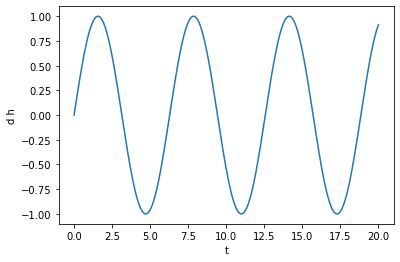

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

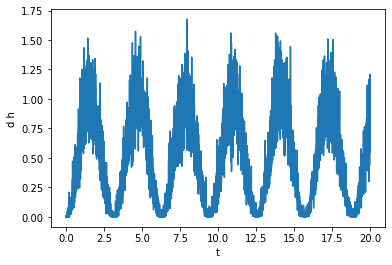

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

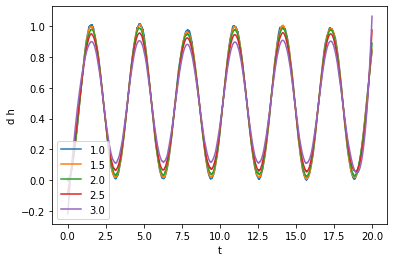

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

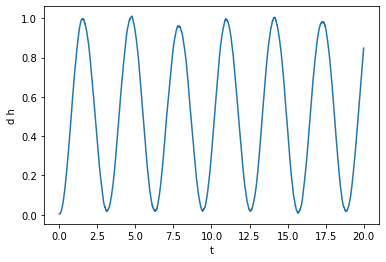

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1657


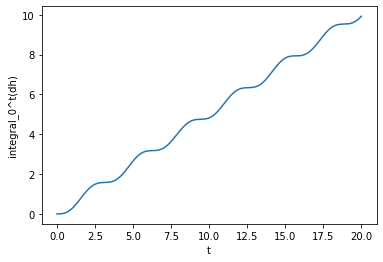

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

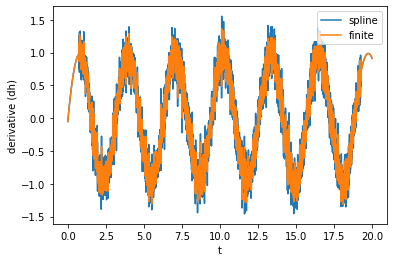

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

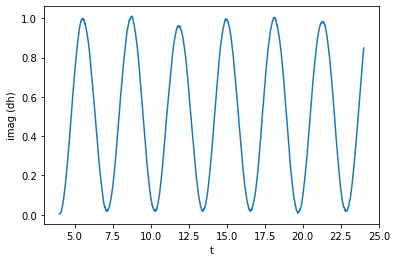

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

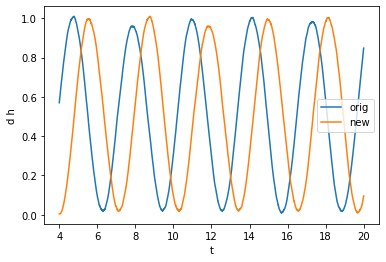

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

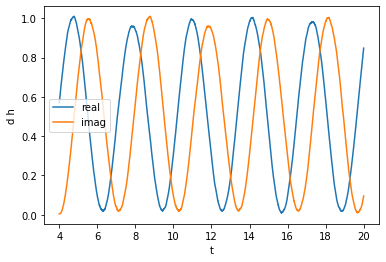

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

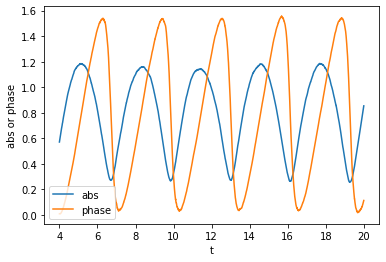

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

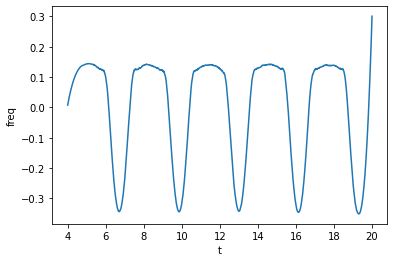

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

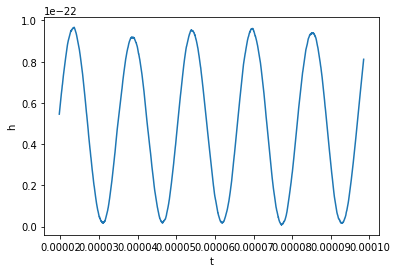

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

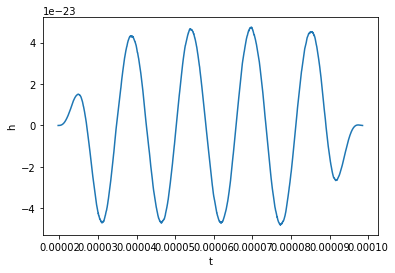

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

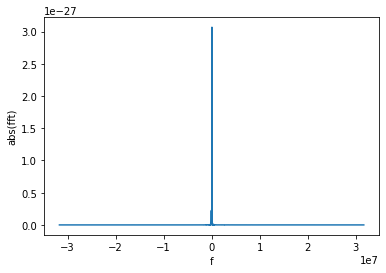

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

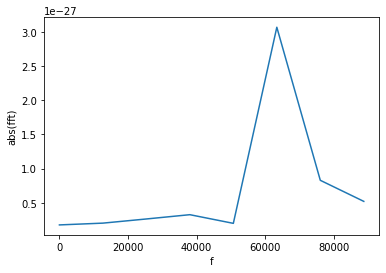

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64214.09


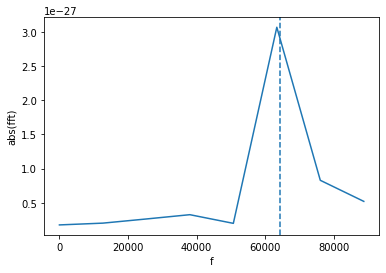

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.068e-27
Maximum with mask 8.298e-28
Length with mask 8
Length after having removed the masked points 7
